## Download Your Netflix Data
>Netflix will email you when your report is available to download. When it is, act fast because the download will “expire” and disappear again after a couple of weeks!

In [37]:
# import libraries
import pandas as pd
df = pd.read_csv('netflix.csv')

In [38]:
df.shape

(1000, 7)

In [27]:
df.head(5)

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [39]:
 # Converting Strings to Datetime and Timedelta in Pandas
df.dtypes

title                 object
rating                object
ratinglevel           object
ratingdescription      int64
release_year           int64
user_rating_score    float64
user_rating_size       int64
dtype: object

In [40]:
# Removing the user_rating_score with NaN values
df.dropna(subset=['user_rating_score'], inplace=True)
df

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
...,...,...,...,...,...,...,...
986,PokÃ©mon: Indigo League,TV-Y,Suitable for all ages.,10,2000,74.0,80
988,Paddington,PG,mild action and rude humor,60,2014,70.0,80
991,Dawn of the Croods,TV-Y7,Suitable for children ages 7 and older,41,2017,72.0,80
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80


> Now we’ve got that column in the correct format, it’s time to change the timezone so that when we do our analysis, we’ll see everything in local time.

>We can convert datetimes to any timezone using the .tz_convert() and passing it an argument with the string for the timezone we want to convert to. In this case, that’s 'US/Eastern'. To find your specific timezone, here’s a handy reference of TZ timezone options.

>The tricky bit here is that we can only use .tz_convert() on a DatetimeIndex, so we need to set our Start Time column as the index using set_index() before we perform the conversion.

>In this tutorial, we’ll then use reset_index() to turn it back into a regular column afterwards. Depending on your preference and goals, this may not be necessary, but for the purposes of simplicity here, we’ll try to do our analysis with all of our data in columns rather than having some of it as the index.

>Putting all of that together looks like this:

In [41]:
# change the Start Time column into the dataframe's index
df.set_index('ratinglevel', inplace=True)

In [42]:
# Filtering Strings by Substring in pandas Using str.contains
df.loc[df['title'].str.contains('1')]

,title,rating,ratingdescription,release_year,user_rating_score,user_rating_size
ratinglevel,,,,,,
This movie has not been rated.,The 100,NR,124,2016,97.0,80
This movie has not been rated.,Hunter X Hunter (2011),NR,124,2013,57.0,80
For mature audiences. May not be suitable for children 17 and under.,13 Reasons Why,TV-MA,110,2017,99.0,80
Parents strongly cautioned. May be unsuitable for children ages 14 and under.,90210,TV-14,90,2013,62.0,80
This movie has not been rated.,The 100,NR,124,2016,97.0,80
For mature audiences. May not be suitable for children 17 and under.,13 Reasons Why,TV-MA,110,2017,99.0,80
NaN,Louis C.K. 2017,TV-MA,110,2017,71.0,80
For mature audiences. May not be suitable for children 17 and under.,13 Reasons Why,TV-MA,110,2017,99.0,80
For mature audiences. May not be suitable for children 17 and under.,13 Reasons Why,TV-MA,110,2017,99.0,80


<AxesSubplot:xlabel='ratinglevel'>

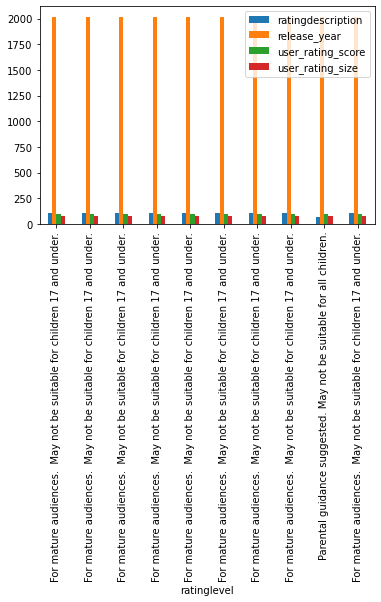

In [46]:
# Create a bar plot of the top 10 movies
df.sort_values(by='user_rating_score', ascending=False).head(10).plot.bar()
 

<AxesSubplot:xlabel='release_year'>

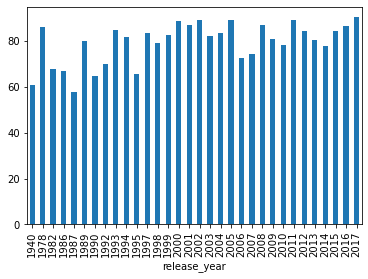

In [54]:
# Create a grapgh of the  all realease year
df.groupby('release_year').user_rating_score.mean().plot.bar()


<AxesSubplot:xlabel='ratinglevel'>

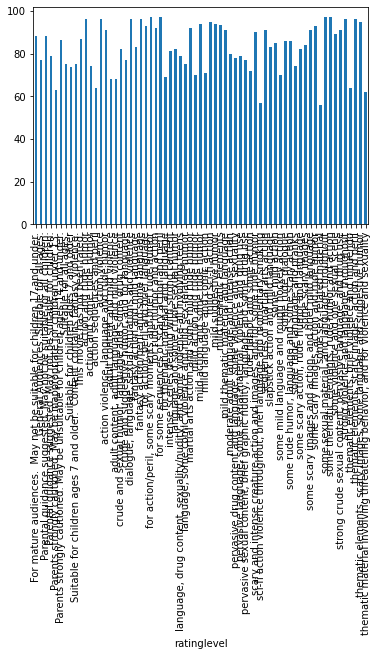

In [61]:
# Create a  grapgh PG rated movies by year 
df.groupby('ratinglevel').user_rating_score.mean().plot.bar()

<AxesSubplot:xlabel='release_year', ylabel='rating'>

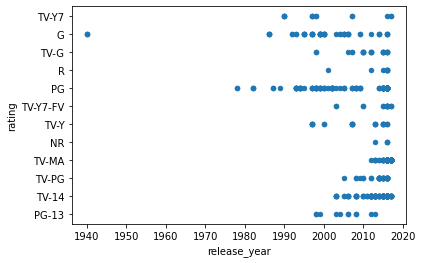

In [65]:
# # Create a scatter plot of the user_rating_score vs the duration
df.plot.scatter(x='release_year', y='rating')

<AxesSubplot:xlabel='release_year'>

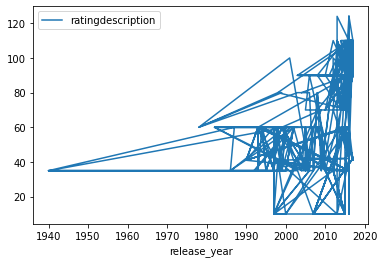

In [68]:
# Create a line plot of the user_rating_score vs the year  
df.plot.line(x='release_year', y='ratingdescription')